In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [2]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
%matplotlib inline

In [63]:
#Load Iris Dataset 

iris = load_iris()

# Get the predictor and response variables
X = iris.data
y = iris.target

# Get the iris label names
target_names = iris.target_names
print(X.shape, y.shape) 

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

(150, 4) (150,)


In [81]:
# Helper function to plot the data as clusters based on the iris species label

def plot3clusters(X, title, vtitle):
    plt.figure()
    
    # Select the colours of the clusters
    colors = ['#A43F98', '#5358E0', '#DE0202']
    lw = 2
    plt.figure(figsize=(9,7));
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw, label=target_name);
   
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title);
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show();

In [71]:
### edTest(test_check_ae) ###

# Create an AE and fit it with our data using 2 neurons in the dense layer using keras' functional API

# Get the number of data samples i.e. the number of rows
input_dim = ___

# Specify the number of neurons for the dense layer
encoding_dim = ___ 

# Specify the input layer
input_features = tf.keras.Input(___)

# Add a denser layer as the encode layer following the input layer with 2 neurons and no activation function
encoded = tf.keras.layers.Dense(___)(input_features)

# Add a denser layer as the decode layer following the encode layer with input_dim as a parameter and no activation function
decoded = tf.keras.layers.Dense(___)(encoded)

# Create an autoencoder model which has input as input_features and outputs decoded
autoencoder = tf.keras.Model(___, ___)

# Complile the autoencoder model
autoencoder.compile(___)

# View the summary of the autoencoder
autoencoder.summary()

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


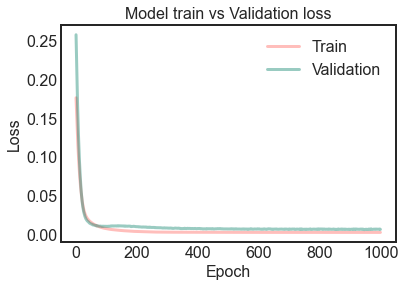

In [72]:
# Use the helper function to plot the model history

# Get the history of the model to plot
history = autoencoder.fit(X_scaled, X_scaled,
                epochs=___,
                batch_size=16,
                shuffle=___,
                validation_split=0.1,
                verbose = 0)

# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()


<Figure size 432x288 with 0 Axes>

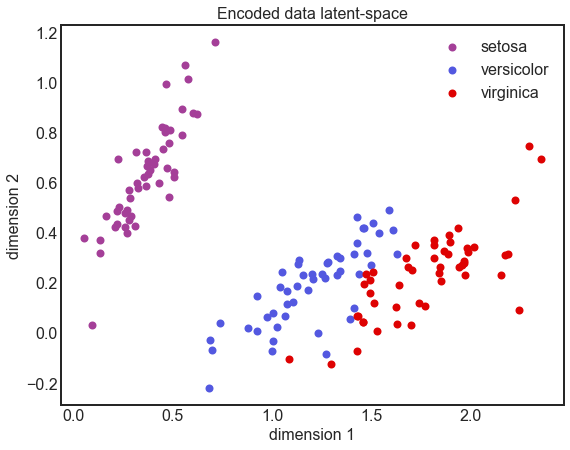

In [82]:
# Create a model which has input as input_features and output as encoded

encoder = tf.keras.Model(___, ___)

# Predict on the entire data using the encoder model, remember to use scaled_X 
encoded_data = encoder.predict(___)

# Call the function plot3clusters to plot the predicted data using the encoded layer
plot3clusters(encoded_data, 'Encoded data latent-space', 'dimension ');

# Mindchow 🍲
Go back and train for more epochs. Does your latent-space distinguish between the plant types better?